In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.width = 120
pd.options.display.float_format = '{:.2f}'.format

In [3]:
source_data = r'./../data/NSW/processed_data.csv'

In [4]:
source_df = pd.read_csv(source_data).set_index('Unnamed: 0')
print(source_df)

                     PREDISPATCHSEQNO  PERIODID  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  totaldemand   rrp  \
Unnamed: 0                                                                                                     
2010-01-01 00:30:00     2009123083.11     36.50         7680.51      7809.31        22.90      7809.31 21.50   
2010-01-01 01:00:00     2009123083.92     37.00         7428.97      7483.69        22.60      7483.69 20.98   
2010-01-01 01:30:00     2009123084.72     37.50         7084.80      7117.23        22.50      7117.23 20.06   
2010-01-01 02:00:00     2009123085.51     38.00         6751.37      6812.03        22.50      6812.03 17.93   
2010-01-01 02:30:00     2009123086.29     38.50         6484.27      6544.33        22.40      6544.33 17.43   
...                               ...       ...             ...          ...          ...          ...   ...   
2021-03-17 22:00:00     2021031678.94     34.00         7317.70      7419.77        19.70      7419.77 3

In [5]:
print(source_df.isna().sum())

PREDISPATCHSEQNO              0
PERIODID                      0
FORECASTDEMAND                0
TOTALDEMAND                   0
TEMPERATURE                   0
totaldemand                   0
rrp                           0
smoothed_FORECASTDEMAND       0
smoothed_TOTALDEMAND          0
smoothed_TEMPERATURE          0
FORECASTDEMAND_daily         33
TOTALDEMAND_daily            33
normalized_TOTALDEMAND        0
normalized_FORECASTDEMAND     0
normalized_TEMPERATURE        0
dtype: int64


In [6]:
print(source_df.columns)

Index(['PREDISPATCHSEQNO', 'PERIODID', 'FORECASTDEMAND', 'TOTALDEMAND', 'TEMPERATURE', 'totaldemand', 'rrp',
       'smoothed_FORECASTDEMAND', 'smoothed_TOTALDEMAND', 'smoothed_TEMPERATURE', 'FORECASTDEMAND_daily',
       'TOTALDEMAND_daily', 'normalized_TOTALDEMAND', 'normalized_FORECASTDEMAND', 'normalized_TEMPERATURE'],
      dtype='object')


In [7]:
print(source_df)

                     PREDISPATCHSEQNO  PERIODID  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  totaldemand   rrp  \
Unnamed: 0                                                                                                     
2010-01-01 00:30:00     2009123083.11     36.50         7680.51      7809.31        22.90      7809.31 21.50   
2010-01-01 01:00:00     2009123083.92     37.00         7428.97      7483.69        22.60      7483.69 20.98   
2010-01-01 01:30:00     2009123084.72     37.50         7084.80      7117.23        22.50      7117.23 20.06   
2010-01-01 02:00:00     2009123085.51     38.00         6751.37      6812.03        22.50      6812.03 17.93   
2010-01-01 02:30:00     2009123086.29     38.50         6484.27      6544.33        22.40      6544.33 17.43   
...                               ...       ...             ...          ...          ...          ...   ...   
2021-03-17 22:00:00     2021031678.94     34.00         7317.70      7419.77        19.70      7419.77 3

In [8]:
# updated_df.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)

In [9]:
print(source_df.dtypes)

PREDISPATCHSEQNO             float64
PERIODID                     float64
FORECASTDEMAND               float64
TOTALDEMAND                  float64
TEMPERATURE                  float64
totaldemand                  float64
rrp                          float64
smoothed_FORECASTDEMAND      float64
smoothed_TOTALDEMAND         float64
smoothed_TEMPERATURE         float64
FORECASTDEMAND_daily         float64
TOTALDEMAND_daily            float64
normalized_TOTALDEMAND       float64
normalized_FORECASTDEMAND    float64
normalized_TEMPERATURE       float64
dtype: object


In [10]:
# source_df.set_index('datetime')

In [11]:
updated_df = source_df

In [12]:
print(updated_df.index)

Index(['2010-01-01 00:30:00', '2010-01-01 01:00:00', '2010-01-01 01:30:00', '2010-01-01 02:00:00',
       '2010-01-01 02:30:00', '2010-01-01 03:00:00', '2010-01-01 03:30:00', '2010-01-01 04:00:00',
       '2010-01-01 04:30:00', '2010-01-01 05:00:00',
       ...
       '2021-03-17 19:30:00', '2021-03-17 20:00:00', '2021-03-17 20:30:00', '2021-03-17 21:00:00',
       '2021-03-17 21:30:00', '2021-03-17 22:00:00', '2021-03-17 22:30:00', '2021-03-17 23:00:00',
       '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
      dtype='object', name='Unnamed: 0', length=194589)


In [13]:
updated_df.index=pd.to_datetime(updated_df.index)

Dropped Forecast_Daily and TotalDemand_daily - contained 33 N/A's.

In [14]:
updated_df.drop(['FORECASTDEMAND_daily','TOTALDEMAND_daily'],axis=1,inplace=True)

In [15]:
print(updated_df.isna().sum())

PREDISPATCHSEQNO             0
PERIODID                     0
FORECASTDEMAND               0
TOTALDEMAND                  0
TEMPERATURE                  0
totaldemand                  0
rrp                          0
smoothed_FORECASTDEMAND      0
smoothed_TOTALDEMAND         0
smoothed_TEMPERATURE         0
normalized_TOTALDEMAND       0
normalized_FORECASTDEMAND    0
normalized_TEMPERATURE       0
dtype: int64


In [16]:
updated_df

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,TOTALDEMAND,TEMPERATURE,totaldemand,rrp,smoothed_FORECASTDEMAND,smoothed_TOTALDEMAND,smoothed_TEMPERATURE,normalized_TOTALDEMAND,normalized_FORECASTDEMAND,normalized_TEMPERATURE
Unnamed: 0,,,,,,,,,,,,,
2010-01-01 00:30:00,2009123083.11,36.50,7680.51,7809.31,22.90,7809.31,21.50,7699.97,7782.00,25.23,-0.23,-0.33,0.92
2010-01-01 01:00:00,2009123083.92,37.00,7428.97,7483.69,22.60,7483.69,20.98,7690.57,7774.00,25.27,-0.48,-0.52,0.87
2010-01-01 01:30:00,2009123084.72,37.50,7084.80,7117.23,22.50,7117.23,20.06,7681.34,7766.97,25.30,-0.77,-0.78,0.85
2010-01-01 02:00:00,2009123085.51,38.00,6751.37,6812.03,22.50,6812.03,17.93,7672.75,7760.41,25.34,-1.00,-1.04,0.85
2010-01-01 02:30:00,2009123086.29,38.50,6484.27,6544.33,22.40,6544.33,17.43,7665.72,7756.32,25.37,-1.21,-1.24,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 22:00:00,2021031678.94,34.00,7317.70,7419.77,19.70,7419.77,32.00,7400.37,7422.86,19.71,-0.53,-0.60,0.37
2021-03-17 22:30:00,2021031679.79,34.50,7266.89,7417.91,19.50,7417.91,37.01,7399.72,7424.36,19.69,-0.53,-0.64,0.34
2021-03-17 23:00:00,2021031680.64,35.00,7173.87,7287.32,19.10,7287.32,34.49,7399.13,7425.78,19.67,-0.63,-0.71,0.27


In [17]:
# updated_df.set_index('datetime')

In [18]:
# new_df = updated_df

In [19]:
print(updated_df.head())

                     PREDISPATCHSEQNO  PERIODID  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  totaldemand   rrp  \
Unnamed: 0                                                                                                     
2010-01-01 00:30:00     2009123083.11     36.50         7680.51      7809.31        22.90      7809.31 21.50   
2010-01-01 01:00:00     2009123083.92     37.00         7428.97      7483.69        22.60      7483.69 20.98   
2010-01-01 01:30:00     2009123084.72     37.50         7084.80      7117.23        22.50      7117.23 20.06   
2010-01-01 02:00:00     2009123085.51     38.00         6751.37      6812.03        22.50      6812.03 17.93   
2010-01-01 02:30:00     2009123086.29     38.50         6484.27      6544.33        22.40      6544.33 17.43   

                     smoothed_FORECASTDEMAND  smoothed_TOTALDEMAND  smoothed_TEMPERATURE  normalized_TOTALDEMAND  \
Unnamed: 0                                                                                         

In [20]:
demand = updated_df.copy()
demand = demand[['totaldemand']]
demand.loc[:, 'dow'] = demand.index.dayofweek
demand.loc[:, 'doy'] = demand.index.dayofyear
demand.loc[:, 'year'] = demand.index.year
demand.loc[:, 'month'] = demand.index.month
demand.loc[:, 'quarter'] = demand.index.quarter
demand.loc[:, 'hour'] = demand.index.hour


In [21]:
print(demand.head())

                     totaldemand  dow  doy  year  month  quarter  hour
Unnamed: 0                                                            
2010-01-01 00:30:00      7809.31    4    1  2010      1        1     0
2010-01-01 01:00:00      7483.69    4    1  2010      1        1     1
2010-01-01 01:30:00      7117.23    4    1  2010      1        1     1
2010-01-01 02:00:00      6812.03    4    1  2010      1        1     2
2010-01-01 02:30:00      6544.33    4    1  2010      1        1     2


In [22]:
print(demand.iloc[45:60])

                     totaldemand  dow  doy  year  month  quarter  hour
Unnamed: 0                                                            
2010-01-01 23:00:00      8041.77    4    1  2010      1        1    23
2010-01-01 23:30:00      7782.68    4    1  2010      1        1    23
2010-01-02 00:00:00      7574.85    5    2  2010      1        1     0
2010-01-02 00:30:00      7343.30    5    2  2010      1        1     0
2010-01-02 01:00:00      7099.73    5    2  2010      1        1     1
2010-01-02 01:30:00      6779.80    5    2  2010      1        1     1
2010-01-02 02:00:00      6497.47    5    2  2010      1        1     2
2010-01-02 02:30:00      6347.69    5    2  2010      1        1     2
2010-01-02 03:00:00      6223.64    5    2  2010      1        1     3
2010-01-02 03:30:00      6182.07    5    2  2010      1        1     3
2010-01-02 04:00:00      6140.82    5    2  2010      1        1     4
2010-01-02 04:30:00      6224.48    5    2  2010      1        1     4
2010-0

Merge to the updated_df

In [23]:
print(demand.isna().sum())

totaldemand    0
dow            0
doy            0
year           0
month          0
quarter        0
hour           0
dtype: int64


In [24]:
print(demand.index)

DatetimeIndex(['2010-01-01 00:30:00', '2010-01-01 01:00:00', '2010-01-01 01:30:00', '2010-01-01 02:00:00',
               '2010-01-01 02:30:00', '2010-01-01 03:00:00', '2010-01-01 03:30:00', '2010-01-01 04:00:00',
               '2010-01-01 04:30:00', '2010-01-01 05:00:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00', '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00', '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=194589, freq=None)


In [25]:
final_df = pd.merge(updated_df,demand, left_index =True, right_index=True)

In [26]:
print(final_df)

                     PREDISPATCHSEQNO  PERIODID  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  totaldemand_x   rrp  \
Unnamed: 0                                                                                                       
2010-01-01 00:30:00     2009123083.11     36.50         7680.51      7809.31        22.90        7809.31 21.50   
2010-01-01 01:00:00     2009123083.92     37.00         7428.97      7483.69        22.60        7483.69 20.98   
2010-01-01 01:30:00     2009123084.72     37.50         7084.80      7117.23        22.50        7117.23 20.06   
2010-01-01 02:00:00     2009123085.51     38.00         6751.37      6812.03        22.50        6812.03 17.93   
2010-01-01 02:30:00     2009123086.29     38.50         6484.27      6544.33        22.40        6544.33 17.43   
...                               ...       ...             ...          ...          ...            ...   ...   
2021-03-17 22:00:00     2021031678.94     34.00         7317.70      7419.77        19.7

In [27]:
print(final_df.isna().sum())

PREDISPATCHSEQNO             0
PERIODID                     0
FORECASTDEMAND               0
TOTALDEMAND                  0
TEMPERATURE                  0
totaldemand_x                0
rrp                          0
smoothed_FORECASTDEMAND      0
smoothed_TOTALDEMAND         0
smoothed_TEMPERATURE         0
normalized_TOTALDEMAND       0
normalized_FORECASTDEMAND    0
normalized_TEMPERATURE       0
totaldemand_y                0
dow                          0
doy                          0
year                         0
month                        0
quarter                      0
hour                         0
dtype: int64


In [28]:
print(final_df.index)

DatetimeIndex(['2010-01-01 00:30:00', '2010-01-01 01:00:00', '2010-01-01 01:30:00', '2010-01-01 02:00:00',
               '2010-01-01 02:30:00', '2010-01-01 03:00:00', '2010-01-01 03:30:00', '2010-01-01 04:00:00',
               '2010-01-01 04:30:00', '2010-01-01 05:00:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00', '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00', '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=194589, freq=None)


In [29]:
final_df['season'] = final_df['month'].apply(lambda month: 1 if month in [12, 1, 2] else
                                  (2 if month in [3, 4, 5] else
                                  (3 if month in [6, 7, 8] else
                                  (4 if month in [9, 10, 11] else None))))

In [30]:
print(final_df.index)

DatetimeIndex(['2010-01-01 00:30:00', '2010-01-01 01:00:00', '2010-01-01 01:30:00', '2010-01-01 02:00:00',
               '2010-01-01 02:30:00', '2010-01-01 03:00:00', '2010-01-01 03:30:00', '2010-01-01 04:00:00',
               '2010-01-01 04:30:00', '2010-01-01 05:00:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00', '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00', '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=194589, freq=None)


In [31]:
print(final_df)

                     PREDISPATCHSEQNO  PERIODID  FORECASTDEMAND  TOTALDEMAND  TEMPERATURE  totaldemand_x   rrp  \
Unnamed: 0                                                                                                       
2010-01-01 00:30:00     2009123083.11     36.50         7680.51      7809.31        22.90        7809.31 21.50   
2010-01-01 01:00:00     2009123083.92     37.00         7428.97      7483.69        22.60        7483.69 20.98   
2010-01-01 01:30:00     2009123084.72     37.50         7084.80      7117.23        22.50        7117.23 20.06   
2010-01-01 02:00:00     2009123085.51     38.00         6751.37      6812.03        22.50        6812.03 17.93   
2010-01-01 02:30:00     2009123086.29     38.50         6484.27      6544.33        22.40        6544.33 17.43   
...                               ...       ...             ...          ...          ...            ...   ...   
2021-03-17 22:00:00     2021031678.94     34.00         7317.70      7419.77        19.7

In [32]:
def Degree_Days2(df, HDD_ct=17, CDD_ct=19.5):
    Tbar = df.resample('24H', offset='21H').mean() # Mean from 9pm (day i-1) - 9pm (day i)
    DD = pd.DataFrame(index=df.index, columns=['HDD', 'CDD'])
    for i in range(0,Tbar.shape[0]):
        DD['HDD'].iloc[48*(i):48*(i+1)] = max(0, HDD_ct-Tbar.iloc[i])
        DD['CDD'].iloc[48*(i):48*(i+1)] = max(0, Tbar.iloc[i]-CDD_ct)
    return Tbar, DD

In [33]:
Degree_Days2(final_df['TEMPERATURE'])

(Unnamed: 0
 2009-12-31 21:00:00   25.26
 2010-01-01 21:00:00   25.09
 2010-01-02 21:00:00   19.94
 2010-01-03 21:00:00   20.61
 2010-01-04 21:00:00   22.43
                        ... 
 2021-03-13 21:00:00   19.38
 2021-03-14 21:00:00   17.14
 2021-03-15 21:00:00   17.51
 2021-03-16 21:00:00   19.75
 2021-03-17 21:00:00   19.23
 Freq: 24H, Name: TEMPERATURE, Length: 4095, dtype: float64,
                     HDD  CDD
 Unnamed: 0                  
 2010-01-01 00:30:00   0 5.76
 2010-01-01 01:00:00   0 5.76
 2010-01-01 01:30:00   0 5.76
 2010-01-01 02:00:00   0 5.76
 2010-01-01 02:30:00   0 5.76
 ...                  ..  ...
 2021-03-17 22:00:00   0 4.42
 2021-03-17 22:30:00   0 4.42
 2021-03-17 23:00:00   0 4.42
 2021-03-17 23:30:00   0 4.42
 2021-03-18 00:00:00   0 4.42
 
 [194589 rows x 2 columns])

In [34]:
Tbar, DD = Degree_Days2(final_df['TEMPERATURE'])

In [35]:
print(Tbar.isna().sum())

30


In [36]:
print(DD.isna().sum())

HDD    0
CDD    0
dtype: int64


In [37]:
print(DD['HDD'])

Unnamed: 0
2010-01-01 00:30:00    0
2010-01-01 01:00:00    0
2010-01-01 01:30:00    0
2010-01-01 02:00:00    0
2010-01-01 02:30:00    0
                      ..
2021-03-17 22:00:00    0
2021-03-17 22:30:00    0
2021-03-17 23:00:00    0
2021-03-17 23:30:00    0
2021-03-18 00:00:00    0
Name: HDD, Length: 194589, dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


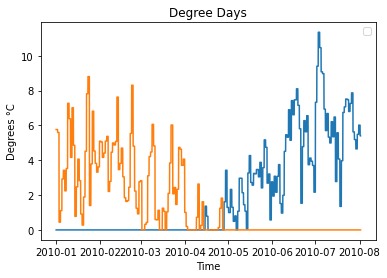

In [43]:
plt.plot(DD.iloc[1:10000])
plt.title("Degree Days")
plt.xlabel("Time")
plt.ylabel("Degrees °C")
plt.legend()
plt.show()